In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#x = [x**2 for x in range(1,100)]
#y = range(1, 100)

In [ ]:
#plt.plot(x, y, 'ro')
#plt.show()

In [ ]:
week1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
week2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt")
week3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt")
week4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt")
week5 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt")
week6 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt")
week7 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt")
week8 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt")
week9 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt")
mtadf = pd.concat([week1, week2, week3, week4, week5, week6, week7, week8, week9])

In [3]:
week1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
week2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt")

In [4]:
week1['week_flg'] = 1
week2['week_flg'] = 2

In [34]:
mtadf = pd.concat([week1, week2], ignore_index=True)

In [35]:
#mtadf = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
mtadf = mtadf.rename(columns=lambda x: x.strip())#stripping trailing/leading blanks

In [36]:
mtadf['date_time'] =pd.to_datetime(mtadf['DATE'] + ' ' + mtadf['TIME'],format="%m/%d/%Y %H:%M:%S")
mtadf['DATE'] = pd.to_datetime(mtadf['DATE'], format="%m/%d/%Y")

In [37]:
mtadf['statline'] = mtadf['STATION'] + ' ' +mtadf['LINENAME']
mtadf = mtadf.drop(axis=1, labels = ['DIVISION', 'DESC']) #drop columns
mtadf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline
0,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,00:00:00,5600838,1896290,1,2016-04-02 00:00:00,59 ST NQR456
1,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,04:00:00,5600863,1896293,1,2016-04-02 04:00:00,59 ST NQR456
2,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,08:00:00,5600877,1896313,1,2016-04-02 08:00:00,59 ST NQR456
3,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,12:00:00,5600922,1896375,1,2016-04-02 12:00:00,59 ST NQR456
4,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,16:00:00,5601172,1896445,1,2016-04-02 16:00:00,59 ST NQR456


In [38]:
mtadf['dow'] = mtadf['DATE'].apply(datetime.weekday) #have to use apply to iterate over series

In [39]:
#mtadf.head(1000)

In [40]:
mtadf= mtadf.sort_values(by=['statline','C/A','UNIT','SCP','date_time'])
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow
29557,H007,R248,00-00-00,1 AV,L,2016-04-02,00:00:00,10910340,11896537,1,2016-04-02 00:00:00,1 AV L,5
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5
29563,H007,R248,00-00-00,1 AV,L,2016-04-03,00:00:00,10913494,11900805,1,2016-04-03 00:00:00,1 AV L,6
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6


In [41]:
mtadf['entrydiff'] = mtadf.groupby(by=[('statline')])['ENTRIES'].diff()
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow,entrydiff
29557,H007,R248,00-00-00,1 AV,L,2016-04-02,00:00:00,10910340,11896537,1,2016-04-02 00:00:00,1 AV L,5,NaN
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5,196.0
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5,118.0
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5,638.0
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5,804.0
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5,816.0
29563,H007,R248,00-00-00,1 AV,L,2016-04-03,00:00:00,10913494,11900805,1,2016-04-03 00:00:00,1 AV L,6,582.0
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6,238.0
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6,85.0
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6,478.0


In [42]:
mtadf2 =mtadf[mtadf['TIME'] != '00:00:00']

In [43]:
mtadf2

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow,entrydiff
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5,196.0
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5,118.0
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5,638.0
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5,804.0
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5,816.0
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6,238.0
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6,85.0
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6,478.0
29567,H007,R248,00-00-00,1 AV,L,2016-04-03,16:00:00,10915128,11902855,1,2016-04-03 16:00:00,1 AV L,6,833.0
29568,H007,R248,00-00-00,1 AV,L,2016-04-03,20:00:00,10915771,11903685,1,2016-04-03 20:00:00,1 AV L,6,643.0


In [52]:
mtadf2['entrydiff'].describe()

count    3.260310e+05
mean     3.876159e+05
std      2.137250e+07
min      1.000000e+00
25%      3.100000e+01
50%      1.230000e+02
75%      3.140000e+02
max      2.146684e+09
Name: entrydiff, dtype: float64

In [55]:
mtadf2["entrydiff"].quantile(.995)

458776.64999999932

In [20]:
mtadf2["entrydiff"].value_counts()

 0.000000e+00    52881
 1.000000e+00     6151
 2.000000e+00     4501
 3.000000e+00     3975
 4.000000e+00     3695
 5.000000e+00     3453
 6.000000e+00     3240
 7.000000e+00     3173
 8.000000e+00     3021
 1.000000e+01     2783
 9.000000e+00     2754
 1.100000e+01     2667
 1.200000e+01     2598
 1.300000e+01     2385
 1.500000e+01     2356
 1.400000e+01     2334
 1.600000e+01     2302
 1.700000e+01     2184
 1.900000e+01     2019
 1.800000e+01     2001
 2.000000e+01     1911
 2.100000e+01     1873
 2.200000e+01     1806
 2.300000e+01     1767
 2.400000e+01     1767
 2.500000e+01     1647
 2.600000e+01     1598
 2.700000e+01     1565
 2.800000e+01     1513
 2.900000e+01     1490
                 ...  
 3.812797e+06        1
-3.524486e+06        1
-1.427441e+06        1
 1.193994e+06        1
-4.049085e+06        1
-4.861383e+07        1
 4.339245e+06        1
-9.046880e+05        1
-3.804250e+05        1
 1.192426e+06        1
 3.289560e+06        1
-9.051170e+05        1
-4.050998e+

In [56]:
mtadf2 = mtadf[mtadf['entrydiff'] < 458777]

In [57]:
len(mtadf2alt)

385702

In [58]:
len(mtadf)

387800

In [59]:
mtadf2 = mtadf[mtadf['entrydiff'] > 0]

In [60]:
mtadf2['entrydiff'].describe()

count    3.260310e+05
mean     3.876159e+05
std      2.137250e+07
min      1.000000e+00
25%      3.100000e+01
50%      1.230000e+02
75%      3.140000e+02
max      2.146684e+09
Name: entrydiff, dtype: float64

In [61]:
mtadf2['entrydiff'].argmin()

134259

In [62]:
mtadf.ix[134259]

C/A                         R170
UNIT                        R191
SCP                     00-03-00
STATION                   103 ST
LINENAME                       1
DATE         2016-04-07 00:00:00
TIME                    05:00:00
ENTRIES                  6893106
EXITS                    3799456
week_flg                       1
date_time    2016-04-07 05:00:00
statline                103 ST 1
dow                            3
entrydiff                      1
Name: 134259, dtype: object

In [93]:
mtadf2['entrydiff'].max()

2146684256.0

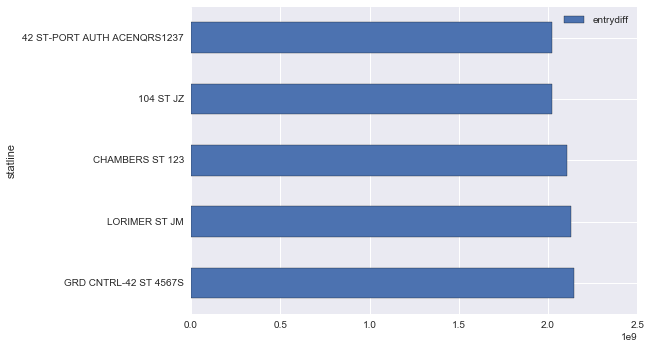

In [94]:
mtadf2.nlargest(5,columns='entrydiff').plot(x= 'statline', y= 'entrydiff',kind='barh')

In [69]:
mtadf2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE', 'TIME', 'ENTRIES',
       'EXITS', 'week_flg', 'date_time', 'statline', 'dow', 'entrydiff'],
      dtype='object')

In [103]:
mtadf3 = mtadf2.groupby(by=['statline'])['entrydiff'].sum()

In [100]:
mtadf3

statline
1 AV L                        1.745007e+06
103 ST 1                      1.405644e+04
103 ST 6                      9.157217e+04
103 ST BC                     2.380202e+02
103 ST-CORONA 7               2.320046e+04
104 ST A                      5.405674e+06
104 ST JZ                     8.162562e+06
110 ST 6                      2.507543e+04
111 ST 7                      2.098495e+03
111 ST A                      5.957520e+03
111 ST J                      9.069946e+03
116 ST 23                     1.115224e+04
116 ST 6                      2.466188e+04
116 ST BC                     2.366446e+06
116 ST-COLUMBIA 1             2.392605e+06
121 ST JZ                     2.114257e+03
125 ST 1                      1.586205e+06
125 ST 23                     3.930892e+06
125 ST 456                    2.133572e+06
125 ST ACBD                   3.389332e+05
135 ST 23                     1.886124e+04
135 ST BC                     9.647090e+04
137 ST CITY COL 1             7.765893e+05
13

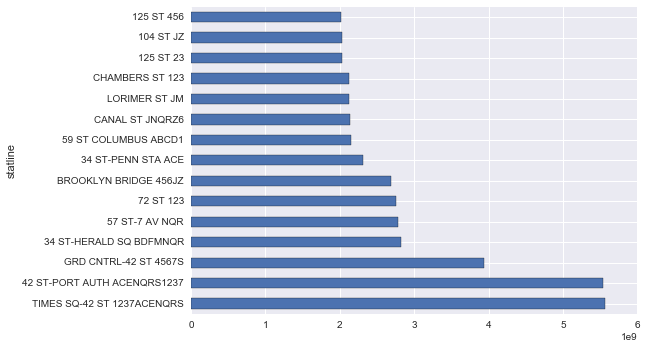

In [107]:
mtadf3.nlargest(15).plot(x= 'statline', y= 'entrydiff',kind='barh')

In [78]:
mtadf3

,statline,dow,entrydiff
0,1 AV L,0,3.733417e+02
1,1 AV L,1,3.917583e+02
2,1 AV L,2,4.184250e+02
3,1 AV L,3,4.217833e+02
4,1 AV L,4,4.387750e+02
5,1 AV L,5,1.257367e+07
6,1 AV L,6,2.895000e+02
7,103 ST 1,0,3.671389e+02
8,103 ST 1,1,4.247879e+02
9,103 ST 1,2,3.757067e+02


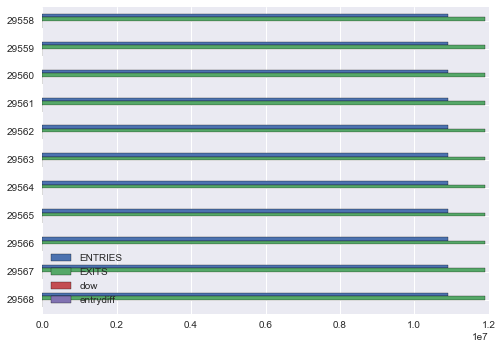

In [85]:
plt.figure(figsize=(15,7))
# plt.figure()
# StatFlowDF2.nlargest(15).plot(kind='bar')
#df = StatFlowDS.sort_values(ascending=False)
ax = mtadf2.iloc[:11].plot(kind="barh")
ax.invert_yaxis()

In [72]:
StatFlowDS = pd.Series(mtadf2[['statline','entrydiff']], name = 'DateValue')
# StatFlowDF2.to_csv('StatFlowDF2.csv')

ValueError: cannot copy sequence with size 2 to array axis with dimension 192421

In [ ]:
diff_df['sumentry'] = mtadf.groupby(by=['statline', 'date_time','dow','TIME']).sum().reset_index()

#df.groupby('userid').sum()
#diff_df.rename(columns = {'ENTRIES':'entrydiff', 'EXITS' :'exitdiff'}, inplace = True)
#print(len(diff_df))

In [ ]:
#pd.value_counts(mtadf['UNIT'].values)
len(diff_df)


In [ ]:
mtadf.dtypes

In [ ]:
#import dateutil.parser
#mtadf['date_time'] = mtadf['DATE'].apply(dateutil.parser.parse )
#mtadf

In [ ]:
#mtadf['DATE'] + ' ' + mtadf['TIME']

In [ ]:
mtadf.dtypes

In [ ]:
diff_df = mtadf.groupby(by=['statline', 'date_time','dow','TIME'])[('ENTRIES','EXITS')].sum().diff().reset_index()
diff_df.rename(columns = {'ENTRIES':'entrydiff', 'EXITS' :'exitdiff'}, inplace = True)
print(len(diff_df))
#mtadf.join(diff_df, on='statline',rsuffix='_r')
#mtadf['exitdiff'] = mtadf['EXITS'].diff()#.replace(np.nan, '')
diff_df

In [ ]:
mtadf.to_csv('/Users/pillbug/mtadf.csv')

In [ ]:
diff_df.sort_values(by=['entrydiff','statline','dow'], ascending=False)

In [ ]:
#df.sort_values(by=['userid','product'])
mtadf.sort_values(by=['entrydiff','STATION','dow'], ascending=False)

In [ ]:
pd.value_counts(mtadf['entrydiff'].values)

In [ ]:
pd.value_counts(mtadf['TIME'].values)

In [ ]:
faculty_dict = {k: v.iloc[:,1:4].values.tolist() for k,v in fac.groupby("lname")}
faculty_dict

In [ ]:
D.head()

In [ ]:
Sdict = defaultdict(list)

for key in Ddict:
# new dict with station identifier as key and all entry/exit counts as list of values
    tmpHdict = defaultdict(list)

    for tf in Ddict[key]:
        DateTime= tf[0]
        volumn = tf[1]

        tmpHdict[DateTime.date()].append(volumn)
#        break
#        print(tmpTdict)

        ## get difference between relevant highest(latest | 8/9pm) & lowest (earliest | 4/5am) index of count of the day
    tmpCdict = defaultdict(list)
    for date in tmpHdict.keys():
#        print (date)
        #count = max(tmpTdict[date]) - min(tmpTdict[date])
        if (len(tmpHdict[date])>=2):
            count = tmpHdict[date][len(tmpHdict[date])-1] - tmpHdict[date][1]
        else:
            count = [0]

        tmpCdict[date].append(count)
    Sdict[key]= tmpCdict

In [ ]:
print({k: Ddict[k] for k in list(Ddict.keys())[:1]})

In [ ]:
## Count Passenger Vol by Station-Unit_SCP

Sdict = defaultdict(list)

for key in Ddict:
# new dict with station identifier as key and all entry/exit counts as list of values
    tmpHdict = defaultdict(list)

    for tf in Ddict[key]:
        DateTime= tf[0]
        #wday = tf[1]
        volume = tf[1]

        tmpHdict[DateTime.date()].append(volume)
#break
#print(tmpTdict)

        ## get difference between relevant highest(latest | 8/9pm) & lowest (earliest | 4/5am) index of count of the day
    tmpCdict = defaultdict(list)
    for date in tmpHdict.keys():
#        print (date)
        #count = max(tmpTdict[date]) - min(tmpTdict[date])
        if (len(tmpHdict[date])>=2):
            count = tmpHdict[date][len(tmpHdict[date])-1] - tmpHdict[date][1]
        else:
            count = [0]

        # tmpCdict[date].append([date.weekday(),count])
        tmpCdict[date.weekday()].append(count)
    Sdict[key]= tmpCdict


#Sdict


## Cluster Count Passenger Vol by Station

DC = {(keys[0],keys[1],keys[3]): values for keys, values in Sdict.items() }


#pd.DataFrame(Sdict[list(Sdict.keys())[0]])
#pd.DataFrame(Sdict[list(Sdict.keys())[1]])
#pd.concat([])

In [ ]:
{k: DC[k] for k in list(DC.keys())[:10]}